# Exploratory Analysis of the Titanic Dataset

In [682]:
# -- impostazione dei titoli --
# # Main title
# ## Analysis Steps
# ### Title
# #### Important text
# Text

The sinking of the Titanic is one of the most famous shipwrecks in history. On April 15, 1912, during its maiden voyage, the Titanic sank after colliding with an iceberg, causing the death of 1502 of the 2224 passengers and crew members. The construction of the Titanic cost about 7.5 million dollars, and it sank into the ocean due to the collision.

Dataset: Titanic - Kaggle

### Objective
The goal is to create a notebook for conducting an exploratory data analysis to determine if the survivors were simply lucky or if some individuals had a higher chance of surviving based on their characteristics.

For this project, we will use the pandas library for data manipulation and matplotlib for data visualization.

---

## Importing the Dataset

Importo delle librerie necessarie per l'analisi dei dati.

In [683]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np 

Importo da csv in dataframe. 

In [684]:
# Dataset with NaN
'''
df_test = pd.read_csv('data/test.csv')
df_train = pd.read_csv('data/train.csv')
df = pd.concat([df_test, df_train])
'''

# Dataset without NaN
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---

## Exploring Missing Values

---

## Feature Analysis

Importo dizionario del dataset.

In [685]:
df_dict = pd.read_csv('data/dictionary.csv')

display(df_dict)

,Variable,Definition,Key
0,survival,Survival,"0 = No, 1 = Yes"
1,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,sex,Sex,NaN
3,Age,Age in years,NaN
4,sibsp,# of siblings / spouses aboard the Titanic,NaN
5,parch,# of parents / children aboard the Titanic,NaN
6,ticket,Ticket number,NaN
7,fare,Passenger fare,NaN
8,cabin,Cabin number,NaN
9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


#### Analizziamo le tipologie di variabili che abbiamo a disposizione.

<style>
  table {
    margin: 0;
    width: 80%; 
  }
  td {
    text-align: left;
    padding: 8px;
  }
  th
  {
    text-align: left;
  }
</style>

<table>
    <tr>
        <td>Variabili <b>categoriche</b>: 
            <ul>
                <li>Sex (male/female);</li>
                <li>Pclass (3rd/2nd/1st);</li>
                <li>Embarked (port);</li>
                <li>Survived (true/false).</li>
            </ul> 
        </td>
        <td>Variabili <b>ordinali</b>:
            <ul>
                <li>Pclass (3rd/2nd/1st);</li>
                <li>Sibsp (siblings+spouse);</li>
                <li>Parch (parents+children).</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td>Variabili <b>continue</b>:
            <ul>
                <li>Age;</li>
                <li>Fare (price of ticket).</li>
            </ul>
        </td>
        <td>Non considerate:<b></b>
            <ul>
                <li>PasssengerId;</li>
                <li>Name;</li>
                <li>Cabin.</li>
            </ul>
        </td>
    </tr>
</table>


---

## Survived

### Analisi Sopravvissuti (variabile categorica)

In [686]:
df_survived = df['Survived'].value_counts(dropna=False)

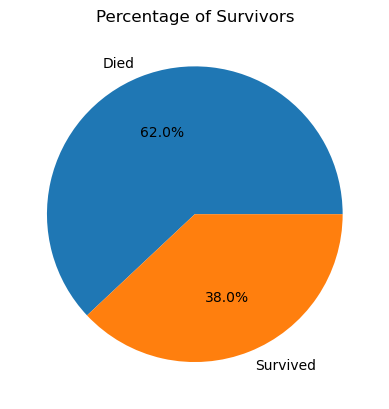

In [687]:

# Data for the pie chart
df_survived_relative = df['Survived'].value_counts(dropna=False, normalize=True) *100
df_survived_relative = df_survived_relative.round()
#labels = list(df_survived_relative.index)
values = list(df_survived_relative)

# Create the pie chart
plt.pie(values, labels=["Died", "Survived"], autopct='%1.1f%%')

# Add a title
plt.title('Percentage of Survivors')

# Display the chart
plt.show()

Dall'analisi dei sopravvissuti emerge che la maggior parte non ce l'ha fatta.

Ma entriamo nel dettaglio di quanti maschi e femmine effettivamente hanno perso la vita

---

## Sex (Gender)

### Analysis of Sex gender relations (Categorical Variable).

#### Relation between sex gender and survival rates

In [688]:
#Survivors aggregated by gender 
gender_survived = df.groupby(by=['Sex', 'Survived'])['Survived'].count()

# Create a pivot table to organize the data
pivot_table = gender_survived.unstack(level=-1).reset_index().rename(columns={0: 'Died', 1: 'Survived'}).rename_axis(columns={'Survived': ''})

# Add a column for the total number of passengers in each class
pivot_table['Total'] = pivot_table['Died'] + pivot_table['Survived']

# Display the table
pivot_table

,Sex,Died,Survived,Total
0,female,81,233,314
1,male,468,109,577


Let's analyse the data with some graphs.

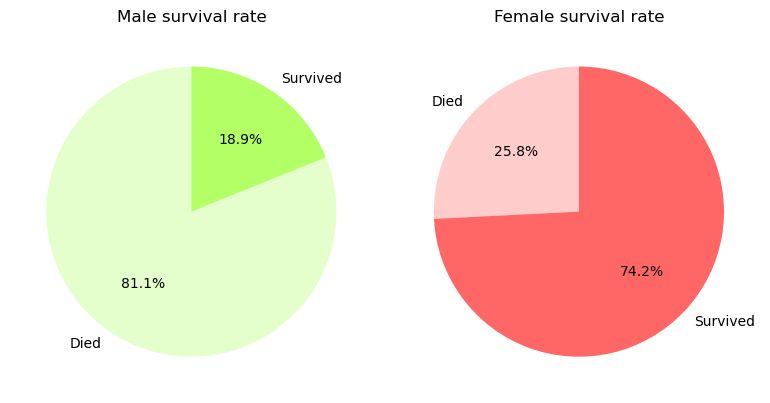

In [689]:
# Gender colors:
male_colors = ["#99FF33", "#B2FF66", "#CCFF99", "#E5FFCC"] # (4 shades of light green)
female_colors = ["#FF3333", "#FF6666", "#FF9999", "#FFCCCC"] # (4 shades of red)

plt.figure(figsize=(8, 4))  # Adjust figure size for better visualization

#Male survivors in a pie chart
male_survived = gender_survived.get('male')

plt.subplot(1, 2, 1)
plt.title("Male survival rate")
plt.pie(male_survived, labels=["Died", "Survived"], autopct='%1.1f%%', colors=[male_colors[3], male_colors[1]], startangle=90)

#female survivors in a pie chart
female_survived = gender_survived.get('female')

plt.subplot(1, 2, 2)
plt.title("Female survival rate")
plt.pie(female_survived, labels=["Died", "Survived"], autopct='%1.1f%%', colors=[female_colors[3], female_colors[1]], startangle=90)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

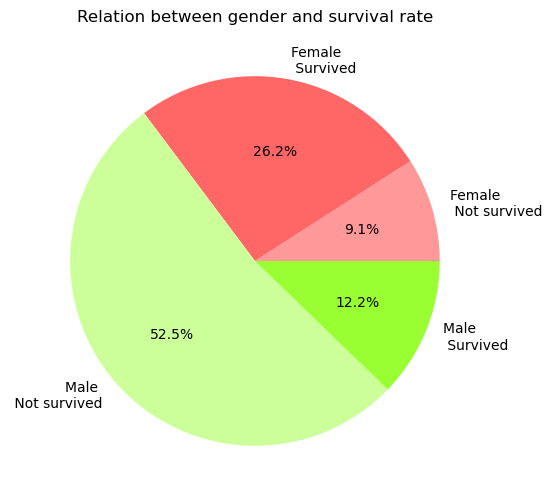

In [690]:
# Create a pivot table to aggregate data by Pclass and survived
pivot_data = df.pivot_table(index='Sex', columns='Survived', aggfunc='size')

pivot_data.index = ["Females", "Male"]
pivot_data.columns = ["Not survived", "Survived"]

# Flatten the pivot table into a single series
flat_data = pivot_data.stack()

# Create a new DataFrame with the flat data and labels
flat_df = pd.DataFrame({'Category': flat_data.index, 'Count': flat_data.values})

# Plot the flat pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    flat_df['Count'], 
    #labels=flat_df['Category'], 
    labels=[
        "Female \n Not survived",
        "Female \n Survived", 
        "Male \n Not survived",
        "Male \n Survived"],
    autopct='%1.1f%%',
    colors= [female_colors[2],female_colors[1], 
             male_colors[2], male_colors[0]]) 

plt.title('Relation between gender and survival rate')
plt.show()

In summary, we can observe a significant disparity in survival rates between genders aboard the Titanic.
 
Women exhibited a markedly higher survival rate compared to men.

---

## Pclass (Ticket Class)


### Analysis of Ticket Class relations (Categorical Variable).

#### Possible analysis tasks:
- Survival Rates: Compare survival rates across different classes.
- Fare Analysis: Analyze the relationship between class and fare paid.
- Cabin Analysis: Examine the distribution of cabin types across different classes.
- Embarkation Port Analysis: Analyze the relationship between class and embarkation port.

#### Relation between travel class and survival rates

In [691]:
class_survived = df.groupby(by=['Pclass', 'Survived'])['Survived'].count()

# Create a pivot table to organize the data
pivot_table = class_survived.unstack(level=-1).reset_index().rename(columns={0: 'Died', 1: 'Survived'}).rename_axis(columns={'Survived': ''})

# Add a column for the total number of passengers in each class
pivot_table['Total'] = pivot_table['Died'] + pivot_table['Survived']

# Display the table
pivot_table

,Pclass,Died,Survived,Total
0,1,80,136,216
1,2,97,87,184
2,3,372,119,491


Let's analyse the data with some graphs.

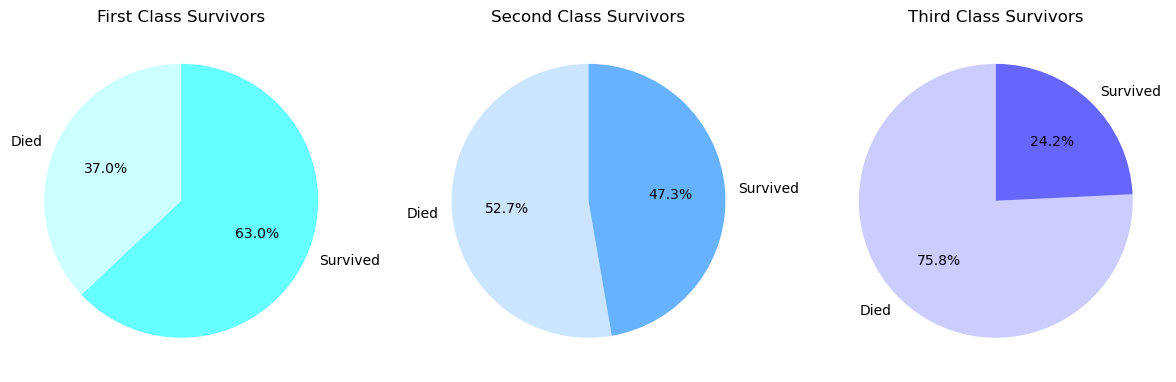

In [692]:
# Class colors:
first_class_colors = ["#66FFFF", "#99FFFF", "#CCFFFF"] # (3 shades of light blue)
second_class_colors = ["#66B2FF", "#99CCFF", "#CCE5FF"] # (3 shades of blue)
third_class_colors = ["#6666FF", "#9999FF", "#CCCCFF"] # (3 shades of dark blue/violet)

# Count
class_survived = df.groupby(by=['Pclass', 'Survived'])['Survived'].count()

# Create pie charts for each Pclass
plt.figure(figsize=(12, 4))  # Adjust figure size for better visualization

# First class
plt.subplot(1, 3, 1)
first_class = class_survived.get(1)
plt.title("First Class Survivors")
plt.pie(first_class, labels=["Died", "Survived"], autopct='%1.1f%%', colors=[first_class_colors[2], first_class_colors[0]],startangle=90)

# Second class
plt.subplot(1, 3, 2)
second_class = class_survived.get(2)
plt.title("Second Class Survivors")
plt.pie(second_class, labels=["Died", "Survived"], autopct='%1.1f%%', colors=[second_class_colors[2], second_class_colors[0]],startangle=90)

# Third class
plt.subplot(1, 3, 3)
third_class = class_survived.get(3)
plt.title("Third Class Survivors")
plt.pie(third_class, labels=["Died", "Survived"], autopct='%1.1f%%', colors=[third_class_colors[2], third_class_colors[0]],startangle=90)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

Let's assume that a higher travel class corresponds to a higher social status. 

From what we can see, most of the first class survived while most of the third class died.

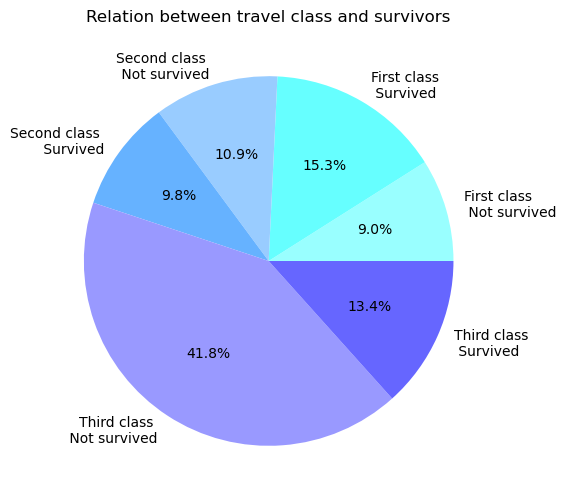

In [693]:
# Create a pivot table to aggregate data by Pclass and survived
pivot_data = df.pivot_table(index='Pclass', columns='Survived', aggfunc='size')

pivot_data.index = ["First class", "Second class", "Third class"]
pivot_data.columns = ["Not survived", "Survived"]

# Flatten the pivot table into a single series
flat_data = pivot_data.stack()

# Create a new DataFrame with the flat data and labels
flat_df = pd.DataFrame({'Category': flat_data.index, 'Count': flat_data.values})

# Plot the flat pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    flat_df['Count'], 
    #labels=flat_df['Category'], 
    labels=[
        "First class \n Not survived",
        "First class \n Survived", 
        "Second class \n Not survived",
        "Second class \n Survived",
        "Third class \n Not survived",
        "Third class \n Survived"],
    autopct='%1.1f%%',
    colors= [first_class_colors[1],first_class_colors[0], 
             second_class_colors[1], second_class_colors[0],
             third_class_colors[1], third_class_colors[0]]) 

plt.title('Relation between travel class and survivors')
plt.show()


From these graphs, we can infer that social rank was a determining factor in survival.

But does the class also influenced gender survival?

---

## 7. Relationship between Sex and Pclass

In [694]:
class_gender_survived = df.groupby(by=['Pclass', 'Survived', 'Sex'])['Survived'].count()
class_gender_survived

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
Name: Survived, dtype: int64

---

## 8. Age

<Axes: ylabel='Frequency'>

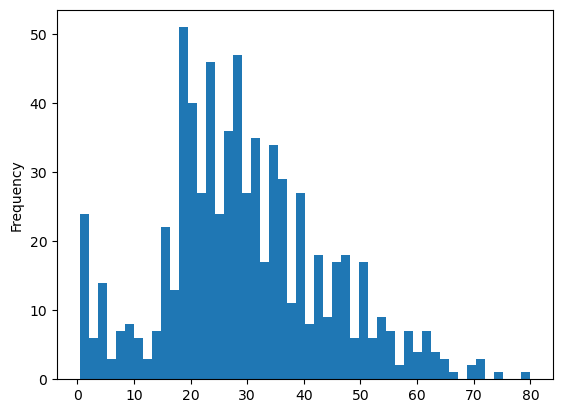

In [695]:
#media
#mediana
##moda
#minimo
#massimo

df["Age"].max()
df["Age"].min()
df["Age"].mean()
df["Age"].median()

df["Age"].plot(kind="hist", bins = 50)